## **[Working with Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)**

In [109]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3156k    0 3156k    0     0  1106k      0 --:--:--  0:00:02 --:--:-- 1106k


In [110]:
import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

<ipython-input-110-61a3c8514cc1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [111]:
data.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [112]:
data.columns = ['Total', 'West', 'East']
data

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0
...,...,...,...
2024-04-30 19:00:00,227.0,86.0,141.0
2024-04-30 20:00:00,94.0,41.0,53.0
2024-04-30 21:00:00,64.0,27.0,37.0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101483 entries, 2012-10-02 13:00:00 to 2024-04-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   101455 non-null  float64
 1   West    101455 non-null  float64
 2   East    101455 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [114]:
data.describe()

,Total,West,East
count,101455.000000,101455.000000,101455.000000
mean,105.377231,45.506717,59.870514
std,131.756240,59.970852,81.603117
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,25.000000,32.000000
75%,143.000000,62.000000,78.000000
max,1097.000000,667.000000,850.000000


In [115]:
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
%matplotlib inline

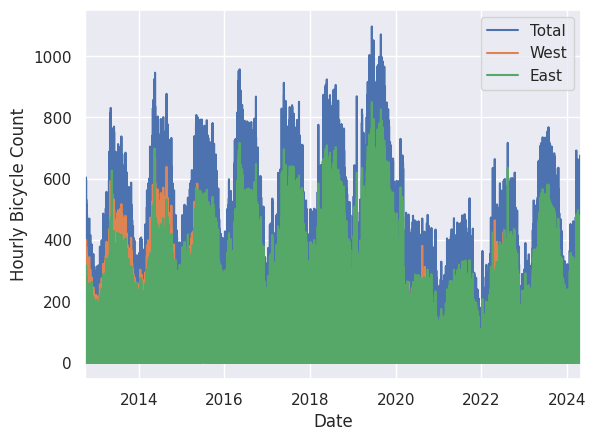

In [116]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's **resample by week**:

In [117]:
weekly = data.resample('W').sum()
weekly

,Total,West,East
Date,,,
2012-10-07,16230.0,8160.0,8070.0
2012-10-14,16795.0,8116.0,8679.0
2012-10-21,15509.0,7563.0,7946.0
2012-10-28,13437.0,6536.0,6901.0
2012-11-04,12194.0,5786.0,6408.0
...,...,...,...
2024-04-07,17457.0,6248.0,11209.0
2024-04-14,17367.0,6361.0,11006.0
2024-04-21,21024.0,7663.0,13361.0


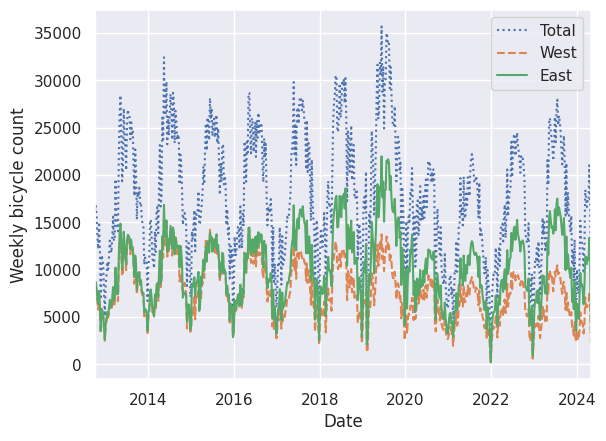

In [118]:
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

### **based on the day of week**

In [119]:
data.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [120]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday

,Total,West,East
Date,,,
0,116.020902,49.442122,66.578780
1,128.878631,54.193266,74.685365
2,128.381967,54.349752,74.032216
3,121.796978,51.427704,70.369274
4,108.900511,46.797847,62.102663
5,69.137555,32.049048,37.088507
6,64.495581,30.276650,34.218931


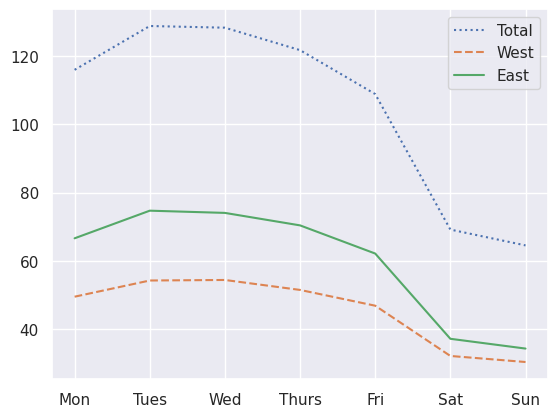

In [121]:
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

### **Only weekends**

In [122]:
data.index.weekday

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=101483)

In [123]:
import numpy as np
# 6,7은 주말휴일(Weekend), 나머지는 주중(Weekday)
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [124]:
data

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0
...,...,...,...
2024-04-30 19:00:00,227.0,86.0,141.0
2024-04-30 20:00:00,94.0,41.0,53.0
2024-04-30 21:00:00,64.0,27.0,37.0


In [125]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        West        East
Weekday 00:00:00    8.261676    3.600861    4.660815
        01:00:00    4.115932    1.838357    2.277575
        02:00:00    2.776085    1.187479    1.588605
        03:00:00    2.379927    1.165287    1.214641
        04:00:00    7.157999    3.285856    3.872143
        05:00:00   28.879762   13.966545   14.913216
        06:00:00  102.152368   48.725406   53.426963
        07:00:00  256.851606  122.092083  134.759523
        08:00:00  360.475654  164.078503  196.397151
        09:00:00  201.805832   86.387343  115.418489
        10:00:00   96.376408   41.926441   54.449967
        11:00:00   78.757204   36.040411   42.716794
        12:00:00   83.637628   38.407420   45.230209
        13:00:00   89.374834   40.924172   48.450662
        14:00:00  102.166501   44.655743   57.510758
        15:00:00  144.888779   61.074148   83.814631
        16:00:00  260.231380   97.100960  163.130420
        17:00:00  439.312479  159.376696  279.935783
        18:00:00  295.841443  119.653426  176.188017
        19:00:00  146.187355   61.495862   84.691493
        20:00:00   82.674942   36.244621   46.430321
        21:00:00   51.868587   23.441576   28.427011
        22:00:00   32.686197   14.328368   18.357829
        23:00:00   20.023833    8.750414   11.273419
Weekend 00:00:00   14.899834    6.618377    8.281457
        01:00:00    8.701987    3.983444    4.718543
        02:00:00    5.608696    2.615385    2.993311
        03:00:00    3.157285    1.325331    1.831954
        04:00:00    3.456126    1.405629    2.050497
        05:00:00    6.863411    3.154801    3.708609
        06:00:00   16.566225    7.391556    9.174669
        07:00:00   31.778146   14.432119   17.346026
        08:00:00   59.144868   27.577815   31.567053
        09:00:00   83.877483   39.636589   44.240894
        10:00:00  106.294702   49.514073   56.780629
        11:00:00  130.842715   61.304636   69.538079
        12:00:00  145.353477   67.998344   77.355132
        13:00:00  153.229305   72.510762   80.718543
        14:00:00  158.391556   75.204470   83.187086
        15:00:00  154.619205   73.426325   81.192881
        16:00:00  140.762417   66.210265   74.552152
        17:00:00  114.920530   53.678808   61.241722
        18:00:00   88.071192   41.047185   47.024007
        19:00:00   63.192053   28.300497   34.891556
        20:00:00   42.475993   19.409768   23.066225
        21:00:00   32.474338   13.746689   18.727649
        22:00:00   21.903146    9.980132   11.923013
        23:00:00   16.427980    7.160596    9.267384

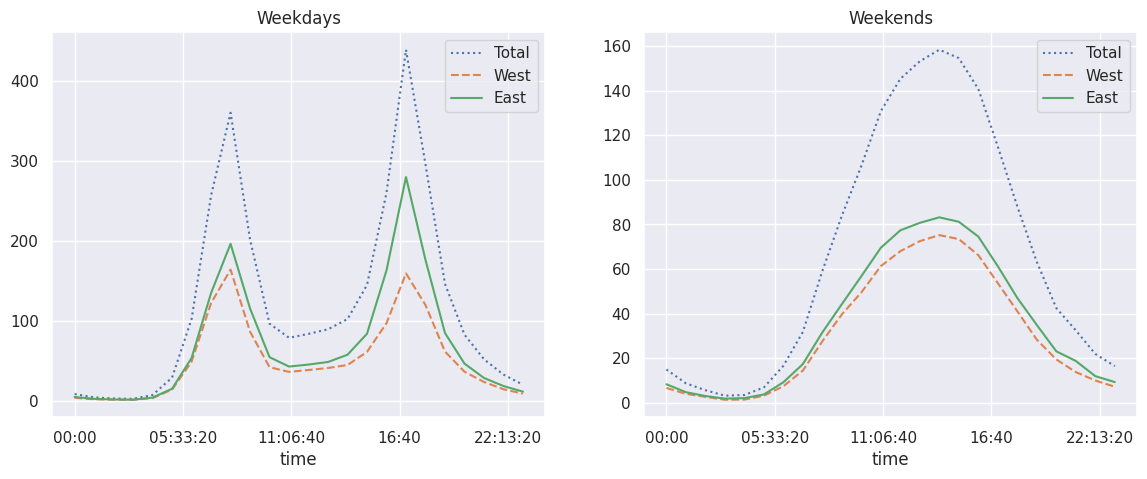

In [126]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                            style=[':', '--', '-']);

In [127]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data
start_date = '2019-01-01'
end_date = '2023-12-31'

# Fetch the data using yfinance
aapl = yf.download('AAPL', start=start_date, end=end_date)
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793777,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481922,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077843,164101200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [128]:
# Fetch the data using yfinance
msft = yf.download('MSFT', start=start_date, end=end_date)
msft

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,95.673447,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,92.153816,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,96.439827,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,96.562805,35656100
2019-01-08,103.040001,103.970001,101.709999,102.800003,97.262978,31514400
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400


In [129]:
# prompt: 어떤 다른 회사가 있는지 확인하고 사전형으로 저장

tickers = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'Tesla': 'TSLA',
    'Berkshire Hathaway': 'BRKA',
    'JPMorgan Chase': 'JPM',
    'Johnson & Johnson': 'JNJ',
    'ExxonMobil': 'XOM',
    'Walmart': 'WMT',
}


In [130]:
# prompt: 회사명을 key로 하고 시계열자료를 데이터프레임으로 저장하는 사전형 자료를 만드는 코드를

company_data = {}
for company_name, ticker_symbol in tickers.items():
  company_data[company_name] = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRKA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [131]:
company_data.keys()

dict_keys(['Apple', 'Microsoft', 'Amazon', 'Alphabet', 'Tesla', 'Berkshire Hathaway', 'JPMorgan Chase', 'Johnson & Johnson', 'ExxonMobil', 'Walmart'])

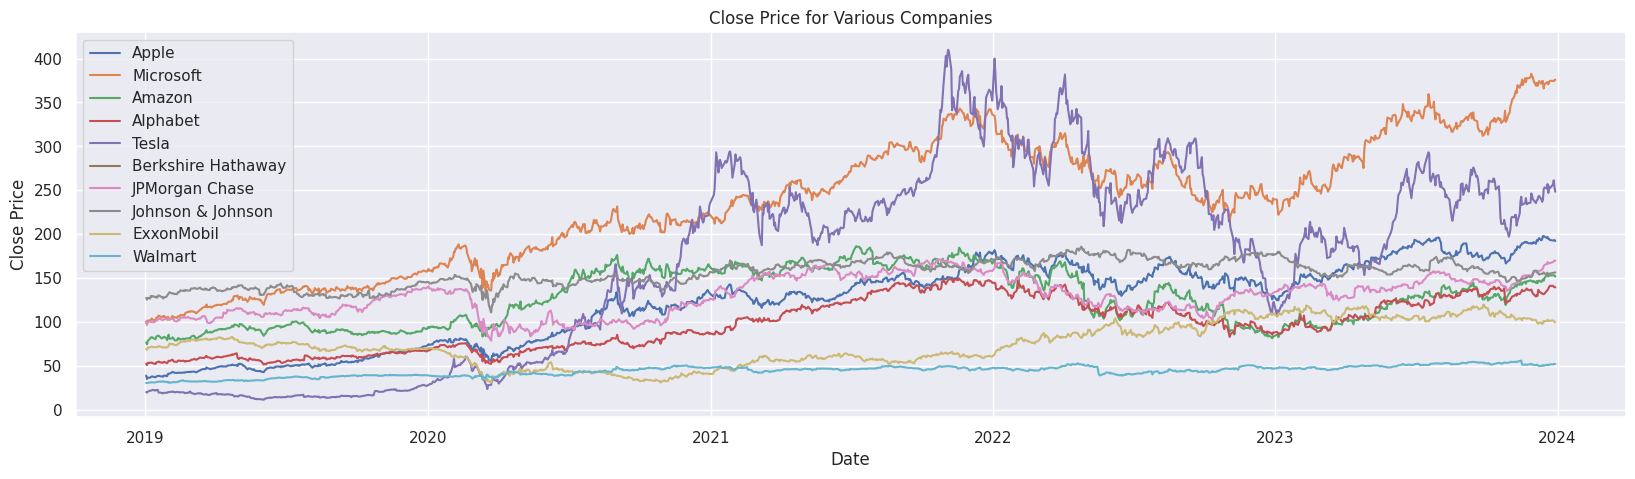

In [132]:
# prompt: 각 회사의 Close변수를 시각화 15, 4 사이즈로

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))

for company_name, data in company_data.items():
  ax.plot(data['Close'], label=company_name)

plt.title('Close Price for Various Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### **시계열데이터(Time serires data analysis)**

### **1. 분해(Decomposition)**

In [133]:
company_data['Apple'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793777,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481922,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077843,164101200


In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [135]:
# Decompose the time series data
decomposition = seasonal_decompose(company_data['Apple']['Close'], model='additive', period=252)
decomposition

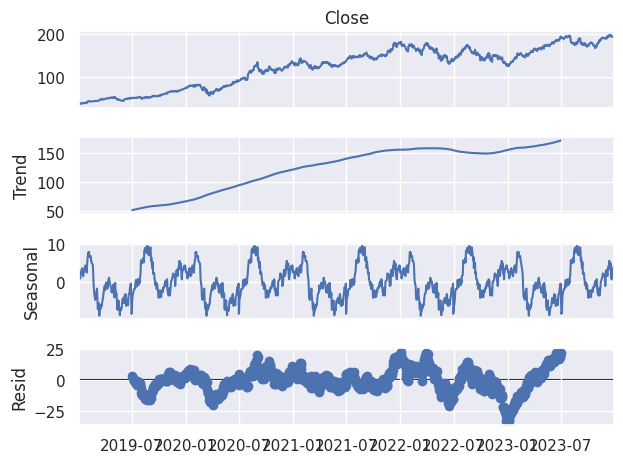

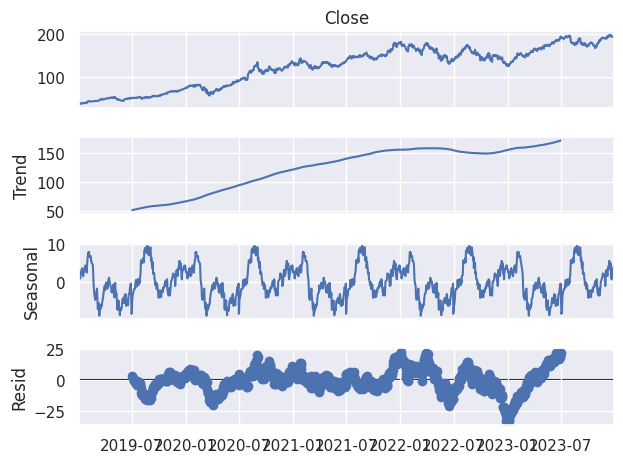

In [136]:
decomposition.plot()

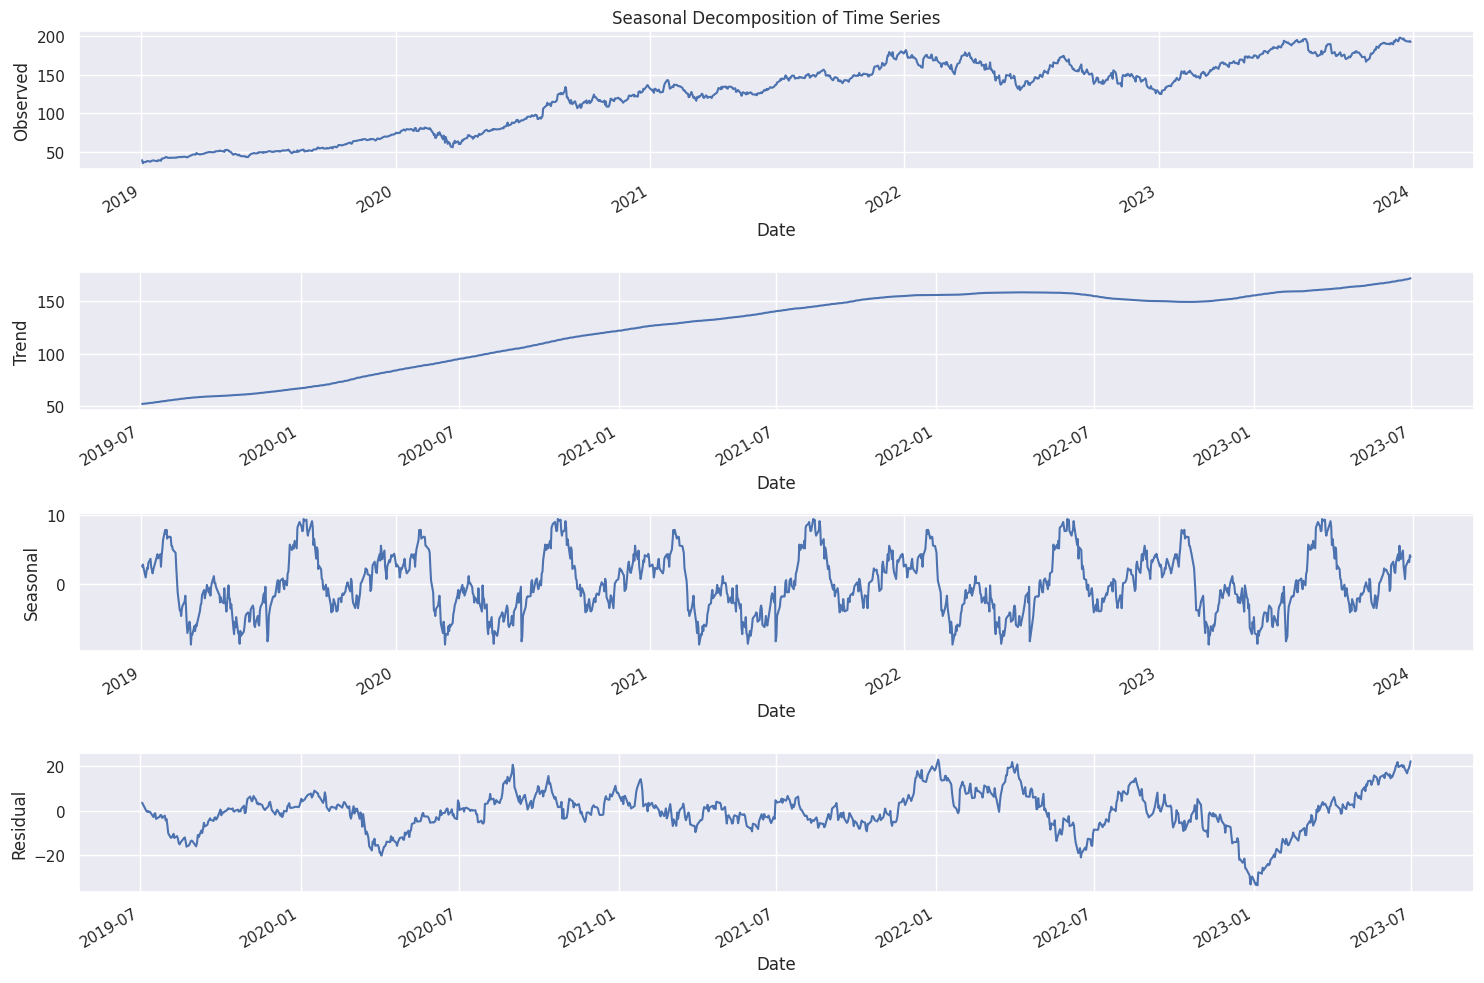

In [137]:
# Enhance the plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition of Time Series')
decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

## **예측(Predictions)**

- **Linear Regression & others**

In [138]:
apple = company_data['Apple']
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793777,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481922,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077843,164101200


<Axes: xlabel='Date'>

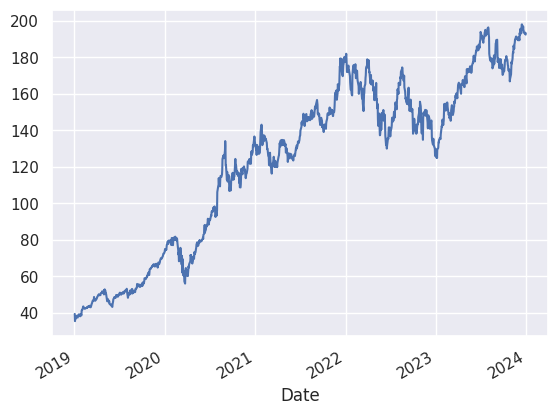

In [139]:
apple['Close'].plot()

### **훈련데이터와 검증데이터 분리**

In [172]:
len(apple['Close'])

1258

In [185]:
np.random.randint(0, 500)

200

In [200]:
X  = np.arange(len(apple['Close'])).reshape(-1,1)[:200]
start = np.random.randint(0, 500)
y = apple['Close'][start: start+200]
X.shape, y.shape

((200, 1), (200,))

### **예측**

MSE of KNN neighbors 1 is 0.0
MSE of KNN neighbors 5 is 0.28682551013423335
MSE of KNN neighbors 20 is 1.0971922970301071
MSE of KNN neighbors 50 is 4.267701210900325
MSE of KNN neighbors 70 is 7.601020021364978
MSE of KNN neighbors 200 is 45.87625253708765


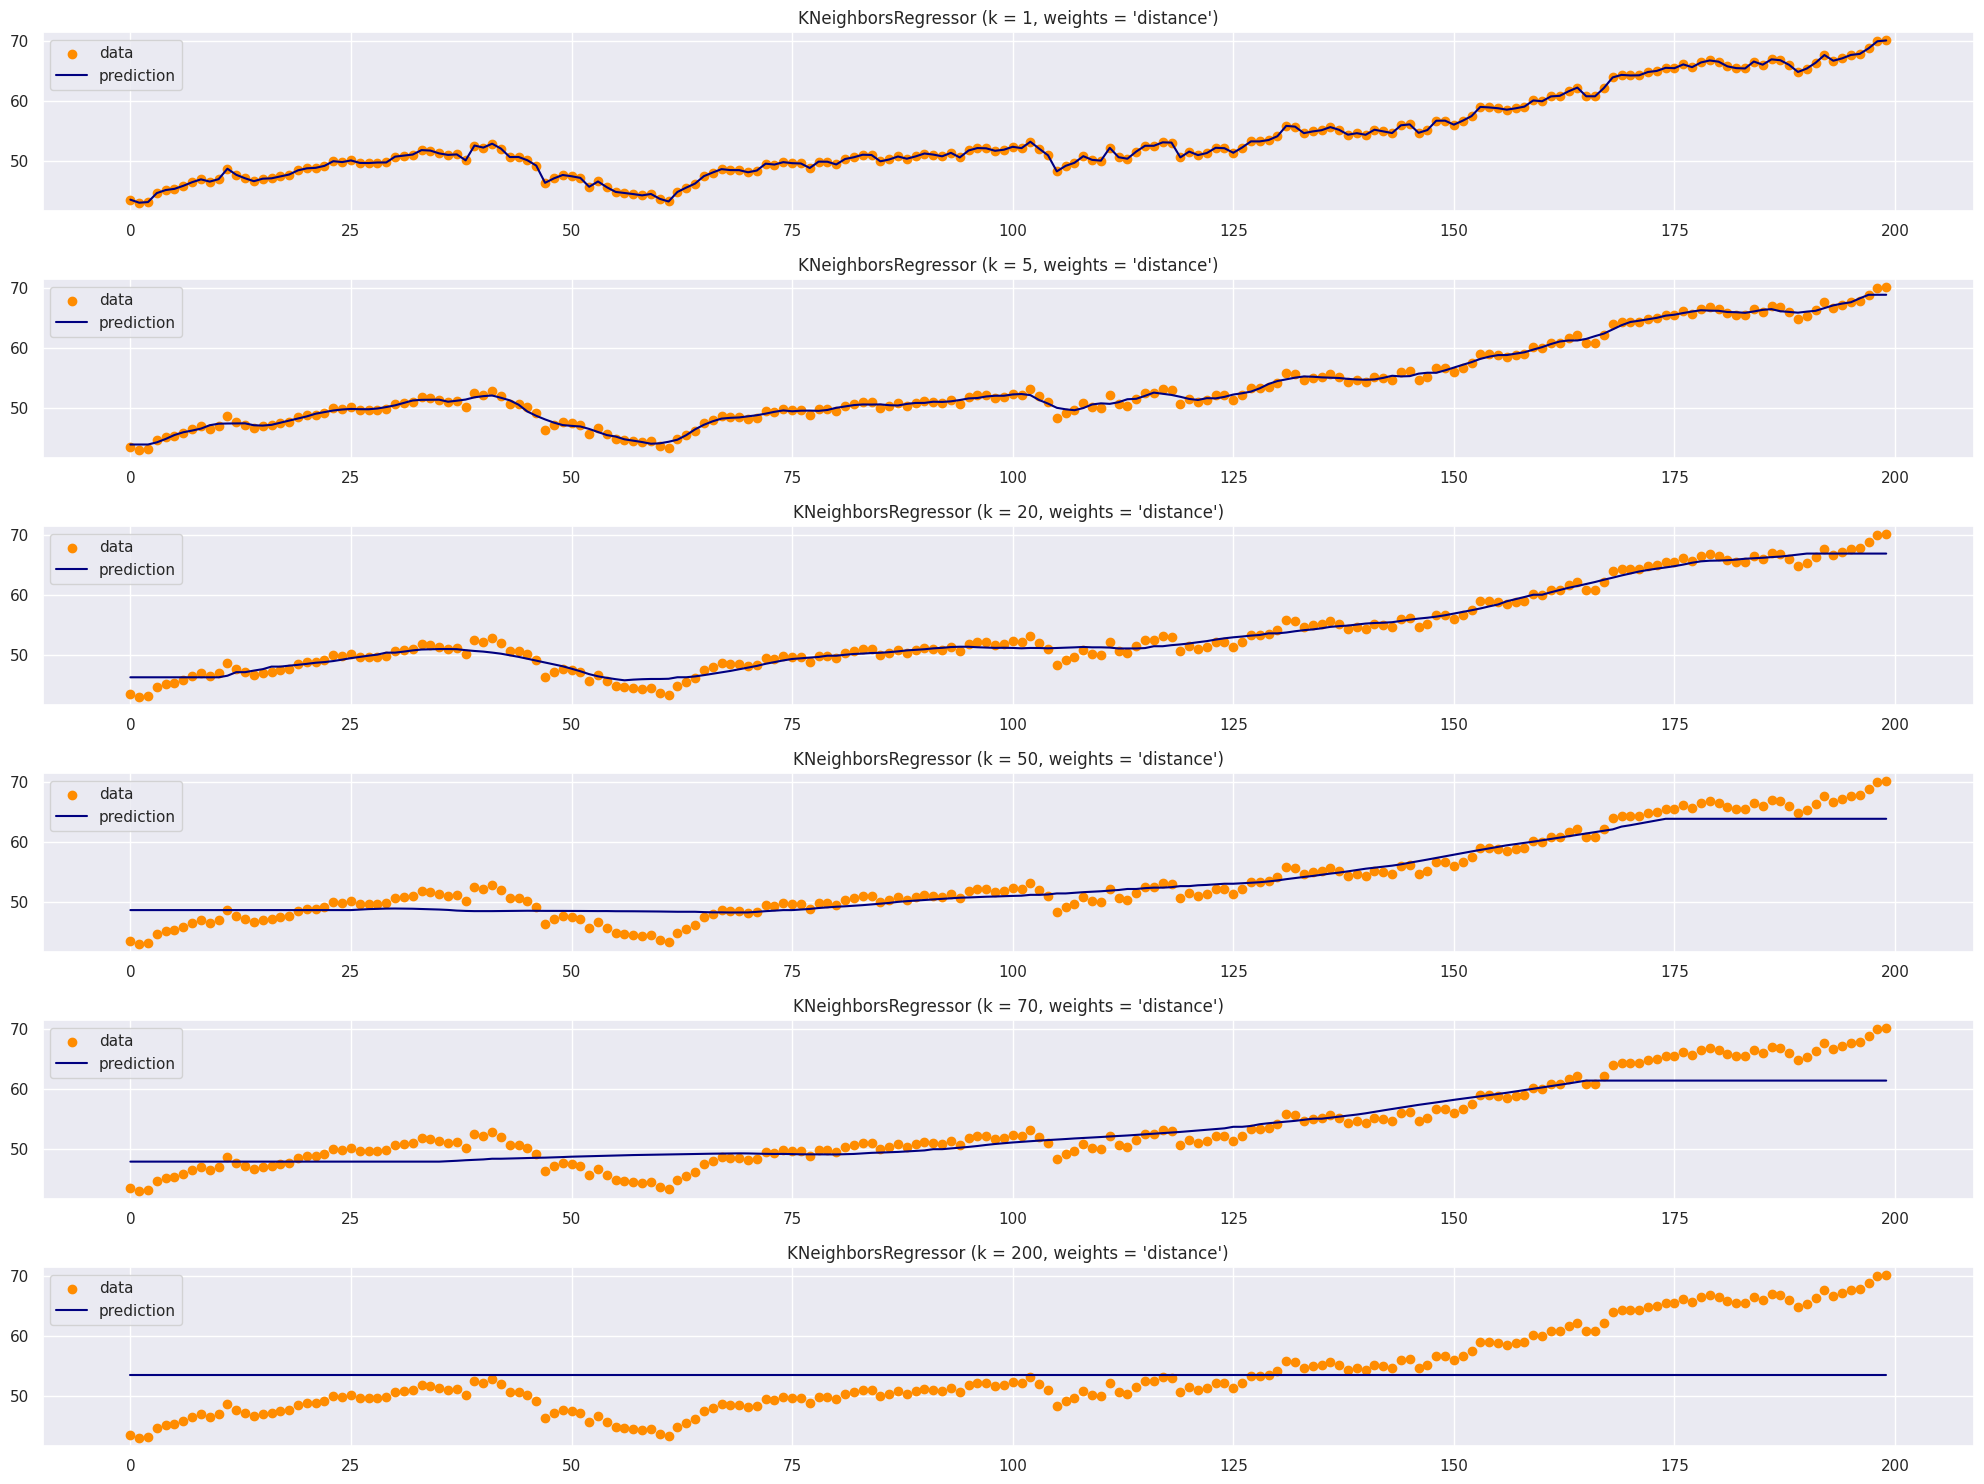

In [201]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

figsize=(20, 15)
plt.figure(figsize=figsize)
params = [1, 5, 20, 50, 70, 200]

for i, n_neighbors in enumerate(params):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
    y_ = knn.fit(X, y).predict(X)
    print(f'MSE of KNN neighbors {n_neighbors} is {mean_squared_error(y, y_)}')

    plt.subplot(len(params), 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(X, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

MSE of linear regression is 10.108404195409129


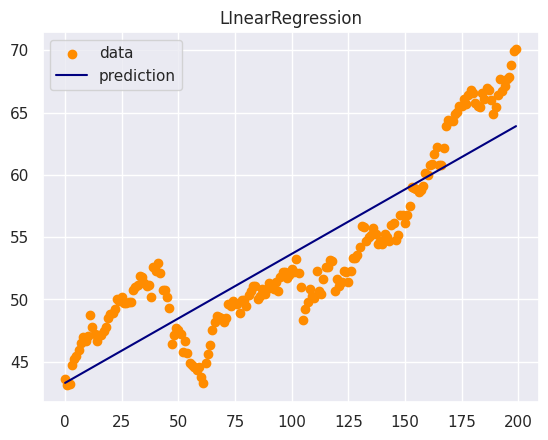

In [203]:
from sklearn.linear_model import LinearRegression

lrg = LinearRegression()
y_lrg = lrg.fit(X, y).predict(X)
print(f'MSE of linear regression is {mean_squared_error(y, y_lrg)}')

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_lrg, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LInearRegression")
plt.show()

## RandomForest regressor로 예측

MSE of RandomForestRegressor with 1 estimators is 1.6778791203487344
MSE of RandomForestRegressor with 5 estimators is 0.7374267926989039
MSE of RandomForestRegressor with 20 estimators is 0.36466605902171706
MSE of RandomForestRegressor with 50 estimators is 0.3961654623503294
MSE of RandomForestRegressor with 70 estimators is 0.39161135256703905
MSE of RandomForestRegressor with 200 estimators is 0.38199986962306637


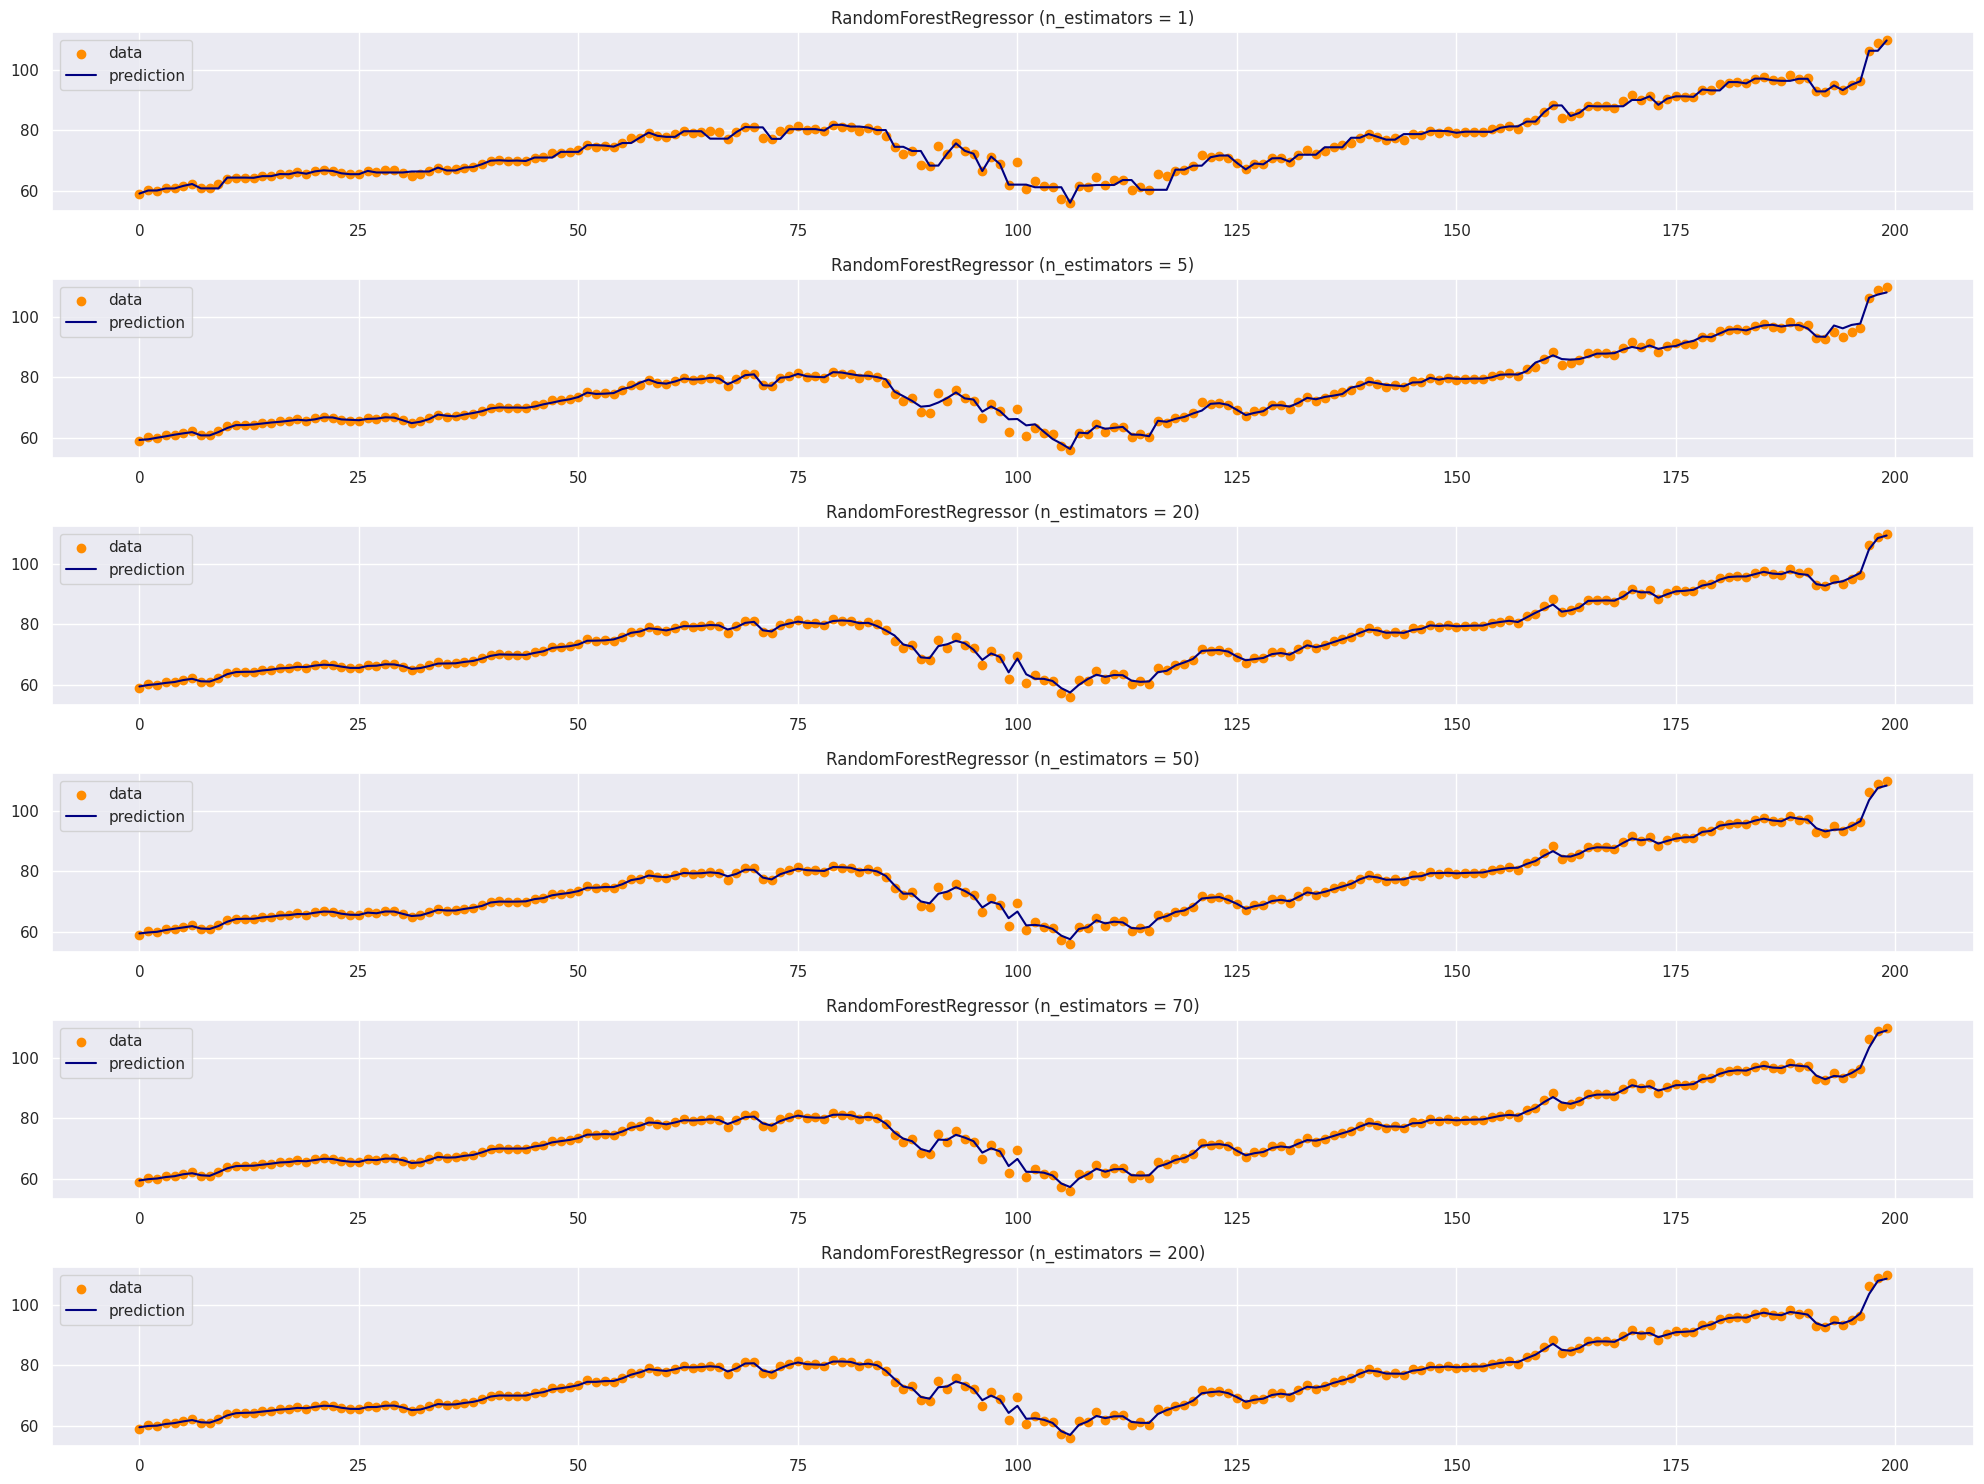

In [204]:
# prompt: randome forest모델로 시계열데이터를 훈련과 검증데이터로 분리하고 hyperparameter tunning하라

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# 훈련데이터와 검증데이터 분리
len(apple['Close'])
np.random.randint(0, 500)
X  = np.arange(len(apple['Close'])).reshape(-1,1)[:200]
start = np.random.randint(0, 500)
y = apple['Close'][start: start+200]
X.shape, y.shape

# RandomForestRegressor로 예측
figsize=(20, 15)
plt.figure(figsize=figsize)
params = [1, 5, 20, 50, 70, 200]

for i, n_estimators in enumerate(params):
    rfr = RandomForestRegressor(n_estimators=n_estimators)
    y_ = rfr.fit(X, y).predict(X)
    print(f'MSE of RandomForestRegressor with {n_estimators} estimators is {mean_squared_error(y, y_)}')

    plt.subplot(len(params), 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(X, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("RandomForestRegressor (n_estimators = %i)" % (n_estimators))

plt.tight_layout()
plt.show()


### **시계열자료의 훈련과 검증데이터를 구분하는 방법은 이렇게**
- **[TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit)**
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png'>
- **[Visualizing cross-validation behavior](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)**